### Task 1: Load and Display a Sample Image

We begin by loading and displaying a single image from the dataset. This helps us verify that the images are properly loaded and ready for processing.

The sample image is fetched from the directory and displayed below.


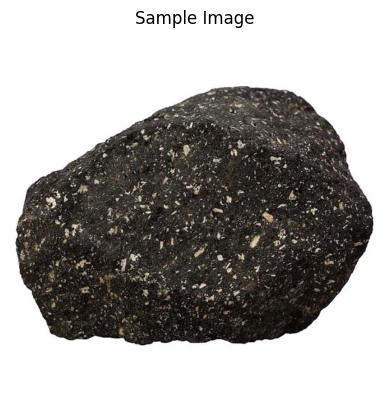

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory containing the images
extracted_file = '360 Rocks'

# Retrieve the list of image files
image_files = os.listdir(extracted_file)

# Select the first image file for visualization
sample_image_path = os.path.join(extracted_file, image_files[0])

# Load the image using PIL
image = Image.open(sample_image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes for a cleaner view
plt.title("Sample Image")
plt.show()


### Task 2: Prepare Directories for Preprocessing

To preprocess the dataset, we need to create a directory for storing grayscale images. This ensures that the original dataset remains untouched while we apply transformations to a separate set of files.


In [24]:
import os

# Specify the input directory containing the original images
input_directory = '360 Rocks'

# Specify the output directory for preprocessed grayscale images
output_directory = 'grayscale_images'

# Check if the output directory exists, if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Created output directory: {output_directory}")
else:
    print(f"Output directory already exists: {output_directory}")


Output directory already exists: grayscale_images


### Task 3: Convert Images to Grayscale

To standardize the dataset, we convert all images to grayscale. This reduces the computational complexity of image processing by removing the color channels while retaining the essential features of the image.

The grayscale images are saved in the `grayscale_images` directory for subsequent steps.


In [25]:
import tensorflow as tf
from PIL import Image
import os

# Iterate through each image in the input directory
for image_file in os.listdir(input_directory):
    # Construct the full path of the image
    image_path = os.path.join(input_directory, image_file)
    
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    grayscale_image = image.convert('L')
    
    # Save the grayscale image to the output directory with the same filename
    grayscale_image.save(os.path.join(output_directory, image_file))

print("All images have been converted to grayscale and saved in the output directory.")


All images have been converted to grayscale and saved in the output directory.


### Task 4: Display Sample Grayscale Images

After converting the dataset to grayscale, we visualize a subset of the images to ensure the preprocessing was successful. Below are the first 5 images from the `grayscale_images` directory.


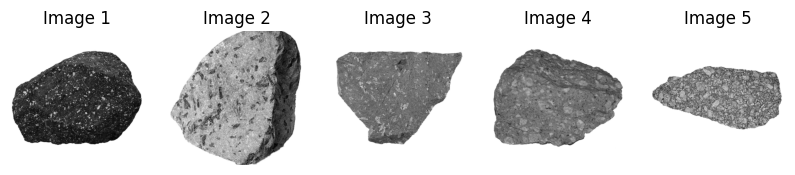

In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to display a few grayscale images
def display_grayscale_images(directory, num_images=5):
    # Get a list of image files from the directory
    image_files = os.listdir(directory)[:num_images]
    
    # Create a figure for displaying the images
    plt.figure(figsize=(10, 5))
    
    for i, image_file in enumerate(image_files):
        # Construct the full path to the image
        image_path = os.path.join(directory, image_file)
        
        # Load the image using PIL
        image = Image.open(image_path)
        
        # Display the image in a subplot
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')  # Hide axes for a cleaner look
        plt.title(f"Image {i + 1}")
    
    # Show the plot
    plt.show()

# Call the function to display the images
display_grayscale_images(output_directory)


### Task 5: Principal Component Analysis (PCA)

To reduce the dimensionality of our grayscale images, we applied PCA. The goal is to retain 90% of the variance, which balances data compression and information preservation. Below are the results:

- **Number of Components Required**: 112
- **Variance Explained Plot**: Shows the cumulative explained variance as we increase the number of components.


The number of components required to retain 90% of the variance: 112


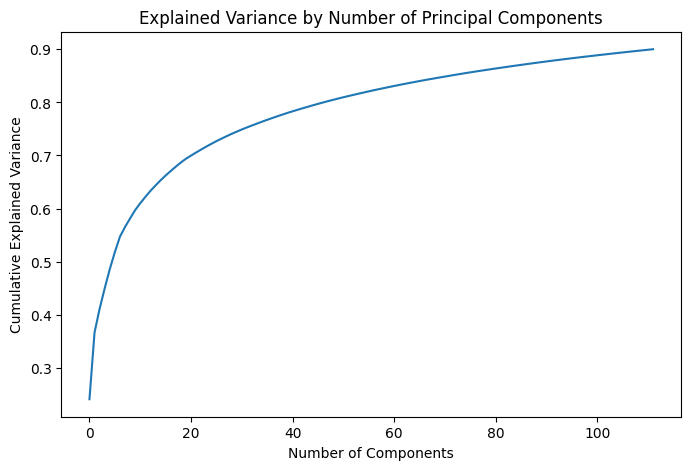

In [ ]:
# 1

import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Images
image_size = (100, 100)  # Resize images to 100x100 pixels for faster computation
images = []  # List to store flattened images
labels = []  # List to store labels

# Loop through each image in the output directory
for image_file in os.listdir(output_directory):
    image_path = os.path.join(output_directory, image_file)
    
    # Open and resize the image
    image = Image.open(image_path).convert('L')
    image = image.resize(image_size)
    
    # Flatten the image to a 1D array
    images.append(np.array(image).flatten())
    
    # Extract label (first letter of filename)
    labels.append(image_file[0])

# Convert the list of images to a NumPy array
images_matrix = np.array(images)

# Step 2: Apply PCA to Preserve 90% of the Variance
pca_90 = PCA(0.90)  # 90% of the variance
pca_90.fit(images_matrix)

# Number of components needed to preserve 90% of the variance
num_components_90 = pca_90.n_components_
print(f"The number of components required to retain 90% of the variance: {num_components_90}")

# Step 3: Visualize the Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_90.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()


### Task 6: Image Reconstruction using PCA

To understand the effects of dimensionality reduction, we reconstructed 10 images from the PCA-reduced space, where 90% of the variance was retained. Below is the comparison:

- **Top Row**: Original Images
- **Bottom Row**: Reconstructed Images


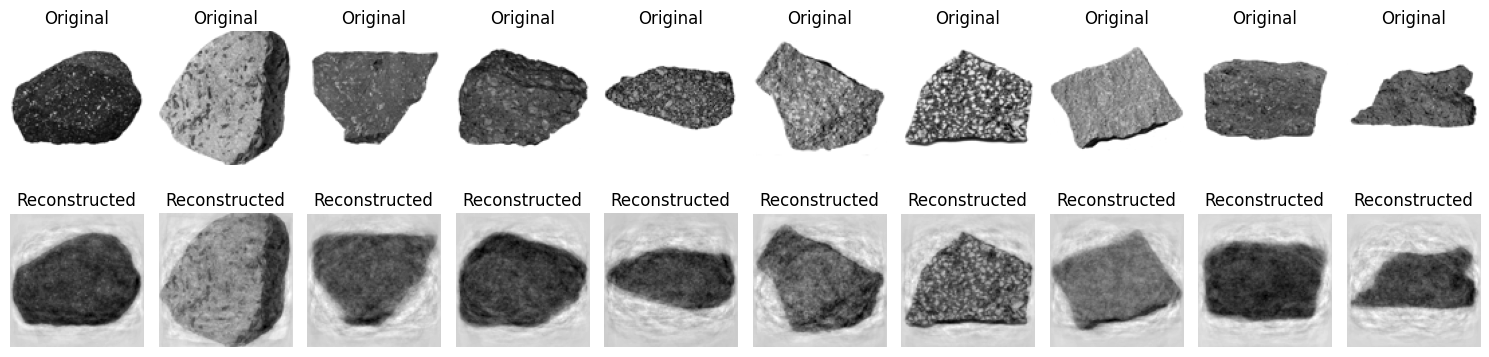

In [ ]:
# 2

# Number of images to display
num_images_to_display = 10

# Select the first 10 images from the dataset
selected_images = images_matrix[:num_images_to_display]

# Step 2: Reconstruct images using PCA
reconstructed_images = pca_90.inverse_transform(pca_90.transform(selected_images))

# Create a figure with subplots for displaying the images
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 4))

# Loop through the selected images and plot them
for i in range(num_images_to_display):
    # Display the original image in the first row
    axes[0, i].imshow(selected_images[i].reshape(image_size), cmap='gray')
    axes[0, i].axis('off')  # Turn off the axes
    axes[0, i].set_title("Original")  # Add title

    # Display the reconstructed image in the second row
    axes[1, i].imshow(reconstructed_images[i].reshape(image_size), cmap='gray')
    axes[1, i].axis('off')  # Turn off the axes
    axes[1, i].set_title("Reconstructed")  # Add title

# Adjust layout
plt.tight_layout()
plt.show()


### Task 7: Dimensionality Reduction to 2 Components using PCA

To prepare the data for visualization, the dimensionality was reduced to 2 components using PCA. Below are the results:

- **Variance Explained by the First Two Components**: 36.66%

This indicates that these two components capture a significant portion of the dataset's variance, making them suitable for visualizing the data in 2D space.


In [ ]:
# 3A

from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(images_matrix)

# Calculate the variance explained by the first two components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two components: {explained_variance:.2%}")


Variance explained by the first two components: 36.66%


### Task 8: PCA Scatter Plot with Image Categories

To investigate if the first two principal components (PC1 and PC2) are sufficient for distinguishing between the three categories, we plotted a scatter plot of the PCA-reduced data. Each point in the plot represents an image, and the colors indicate the corresponding category.

**Observations**:
- Categories overlap in some areas, suggesting that the first two principal components alone might not fully separate the categories.
- Additional components or techniques might be required for better clustering.

**Plot Legend**:
- **Red**: Category `I`
- **Blue**: Category `M`
- **Green**: Category `S`


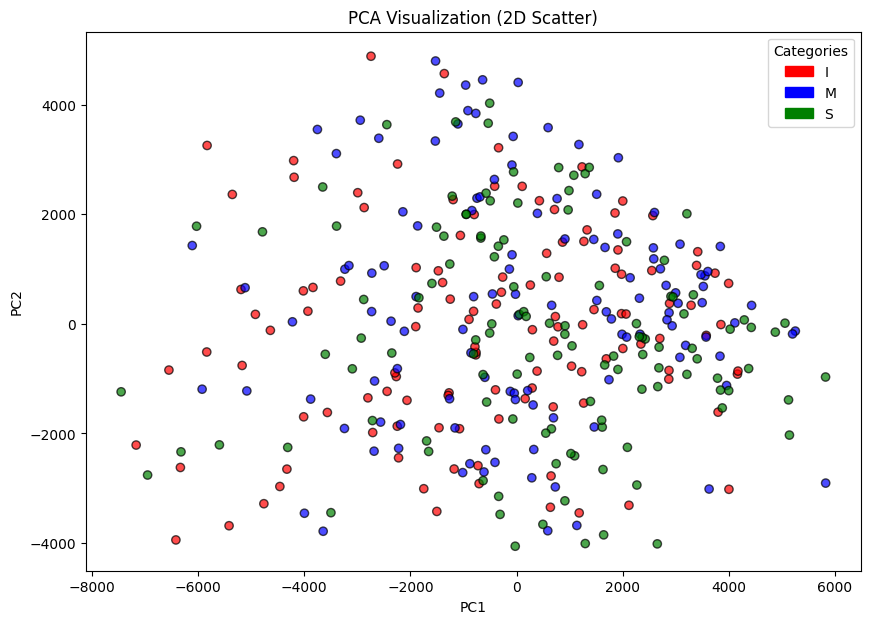

In [30]:
import matplotlib.patches as mpatches

# Step 3: Plot PCA Scatter
categories = {'I': 'red', 'M': 'blue', 'S': 'green'}  # Mapping of categories to colors
colors = [categories[label] for label in labels]  # Assign colors to each label

plt.figure(figsize=(10, 7))

# Scatter plot for PCA components
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors, alpha=0.7, edgecolors='k')

# Add title and axis labels
plt.title("PCA Visualization (2D Scatter)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Create and add legend
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
plt.legend(handles=legend_patches, title="Categories", loc="best")

plt.show()


### Observations from Visualizations

1. **t-SNE**:
   - t-SNE effectively separates clusters in a way that maximizes local relationships.
   - While distinct clusters are visible, overlap exists between some classes, indicating that the features extracted might not fully differentiate all categories.

2. **LLE (Locally Linear Embedding)**:
   - LLE maintains a more linear structure, capturing the global relationships within the dataset.
   - Clusters appear more stretched, with overlapping regions between categories, reflecting a focus on maintaining manifold continuity.

3. **MDS (Multidimensional Scaling)**:
   - MDS appears to focus more on preserving pairwise distances between data points.
   - It demonstrates a linear spread, but clusters overlap significantly, showing that MDS may not handle non-linear separations effectively.

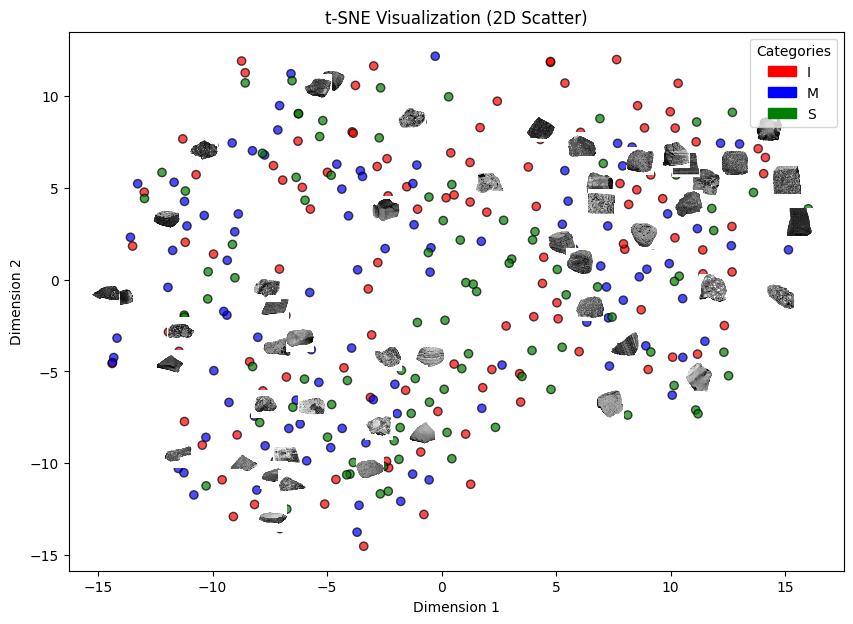

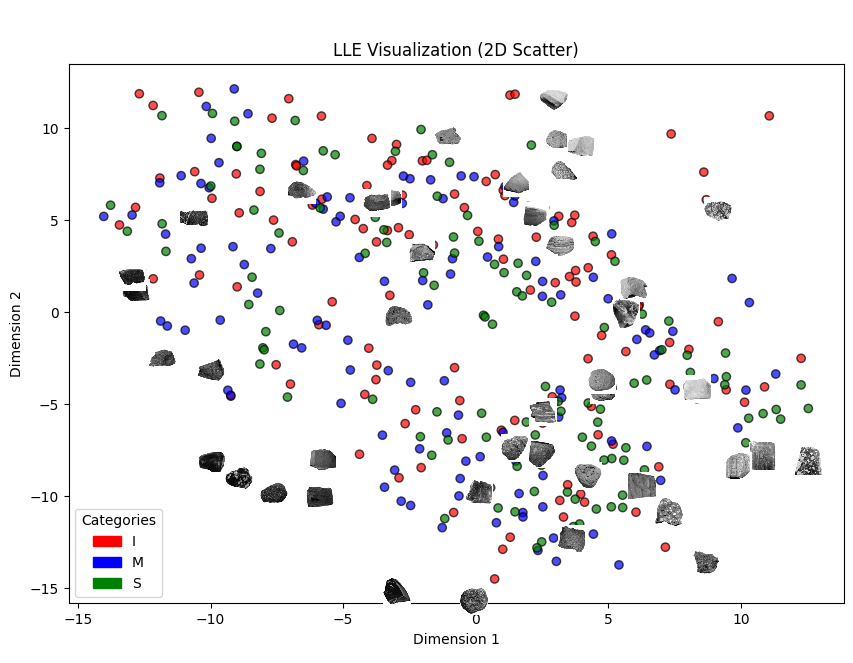

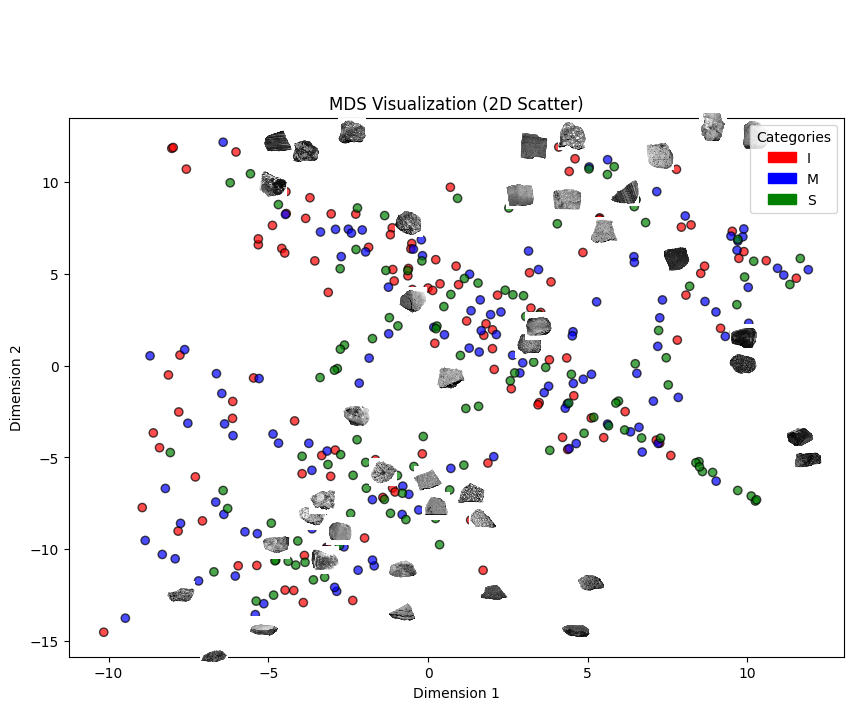

In [ ]:
# 3B

from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def scatter_plot(data, type):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], tsne_data[:, 1], c=colors, alpha=0.7, edgecolors='k')
    plt.title(f"{type} Visualization (2D Scatter)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
    plt.legend(handles=legend_patches, title="Categories", loc="best")

    subset_indices = np.random.choice(len(data), size=50, replace=False)  # Random subset
    for i in subset_indices:
        x, y = data[i]
        image_array = images_matrix[i].reshape(image_size)
        image = OffsetImage(image_array, zoom=0.2, cmap='gray')  # Adjust the zoom factor as needed
        ab = AnnotationBbox(image, (x, y), frameon=False)
        plt.gca().add_artist(ab)

    plt.show()

# Step 4: t-SNE
tsne = TSNE(n_components=2, init="random", learning_rate="auto",)
tsne_data = tsne.fit_transform(images_matrix)
scatter_plot(tsne_data, 't-SNE')

# Step 4: LLE
lle = LocallyLinearEmbedding(n_components=2)
lle_data = tsne.fit_transform(images_matrix)
scatter_plot(lle_data, 'LLE')

# Step 4: MDS
mds = MDS(n_components=2, normalized_stress=False)
mds_data = tsne.fit_transform(images_matrix)
scatter_plot(mds_data, 'MDS')


### **Discussion of Observations (3C)**

Each dimensionality reduction technique provides a unique perspective on the dataset and its structure. PCA, which aims to maximize variance in the data, captures the most significant global trends. While it reveals some separation between the three rock categories (`I`, `M`, `S`), there is noticeable overlap between clusters, suggesting that some categories share features such as texture or shape. t-SNE, on the other hand, excels in capturing local relationships, producing tightly-knit and distinct clusters for the categories. This makes it particularly effective for visualizing smaller-scale patterns in the data. However, t-SNE can distort global relationships, which may lead to difficulty interpreting larger patterns.

LLE focuses on preserving local linear relationships, which results in clusters that reflect neighborhood structures. Although some overlap remains, LLE effectively groups points with similar characteristics. MDS, designed to preserve pairwise distances, provides a global view of the dataset, emphasizing relationships between all data points. While this approach offers a balanced distribution, the resulting clusters may appear less distinct due to its focus on maintaining distances rather than explicitly grouping similar points.

The addition of thumbnail images to the scatter plots enhances interpretability, making it easier to identify the visual features (e.g., texture, brightness, or shape) contributing to the variance and cluster separations. In summary, t-SNE excels at highlighting local groupings, while PCA and MDS are more suitable for understanding global trends, and LLE bridges the gap between local and global perspectives. Each technique provides valuable insights depending on the analytical goal.

### Loading Human Data for Procrustes Analysis
The file `mds_360.txt` contains human-perceived similarity data. This data is loaded using NumPy's `loadtxt` function. The data will later be used in Procrustes analysis to compare how well different machine-learned embeddings align with human-perceived structurest quality.


In [32]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS
from scipy.spatial import procrustes
from scipy.stats import pearsonr

# Load human data
human_data = np.loadtxt('mds_360.txt')  # Assuming the file is space-separated


### Procrustes Analysis and Correlation Evaluation
In this section, we evaluate how well machine-generated embeddings align with human-generated features using Procrustes analysis and correlation computations. We compare results across three dimensionality reduction methods: PCA, LLE, and MDS.

#### Key Steps:
1. **Dimensionality Reduction:**
   - We reduce the dimensionality of the `images_matrix` to 8 using:
     - `PCA`: Captures the most variance in the dataset.
     - `LLE`: Focuses on local relationships between data points.
     - `MDS`: Preserves pairwise distances between points.

2. **Procrustes Analysis:**
   - Aligns the reduced embeddings with the human-generated data (`mds_360.txt`) by scaling, translating, and rotating.
   - Computes:
     - **Disparity:** A measure of misalignment between the two datasets (lower is better).
     - **Aligned Embeddings:** Transformed machine and human data matrices.

3. **Correlation Evaluation:**
   - For each reduced dimension (1–8), Pearson correlation coefficients between aligned datasets are computed.
   - This assesses how well individual dimensions in the embeddings correspond to human features.

4. **Results Compilation:**
   - **Disparity Values:** Printed for PCA, LLE, and MDS.
   - **Correlation Table:** Displays correlation values for each dimension and method in a clear tabular format.
   - **Disparity Summary:** Summarizes disparities for easy comparison across methods.

#### Outcome:
- The results provide insights into:
  - Which dimensionality reduction method aligns most closely with human-generated features.
  - How well individual dimensions capture human-relevant information.
- These evaluations are critical for assessing the interpretability and usefulness of machine-generated embeddings.
e data


In [ ]:
# 4

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS
from scipy.spatial import procrustes

# Function to perform dimensionality reduction
def reduce_dimensionality(method, data, n_components=8):
    if method == "PCA":
        reducer = PCA(n_components=n_components)
    elif method == "LLE":
        reducer = LocallyLinearEmbedding(n_components=n_components)
    elif method == "MDS":
        reducer = MDS(n_components=n_components)
    else:
        raise ValueError(f"Unknown method: {method}")
    return reducer.fit_transform(data)

# Function to perform Procrustes Analysis and compute correlations
def perform_procrustes_and_correlation(human_data, embeddings, method_name):
    mtx1, mtx2, disparity = procrustes(human_data, embeddings)
    correlations = [np.corrcoef(mtx1[:, i], mtx2[:, i])[0, 1] for i in range(8)]
    print(f"Disparity for {method_name}: {disparity}")
    return disparity, correlations

# Load data
# images_matrix = ...  # Replace with your image matrix (360 samples x features)
matrix_with_human_data = np.loadtxt('mds_360.txt')

# Dimensionality reduction and Procrustes Analysis
methods = ["PCA", "LLE", "MDS"]
results = {}

for method in methods:
    embeddings = reduce_dimensionality(method, images_matrix, n_components=8)
    disparity, correlations = perform_procrustes_and_correlation(matrix_with_human_data, embeddings, method)
    results[method] = {"disparity": disparity, "correlations": correlations}

# Create a DataFrame for correlation results
correlation_table = pd.DataFrame({
    "Dimension": range(1, 9),
    "PCA": results["PCA"]["correlations"],
    "LLE": results["LLE"]["correlations"],
    "MDS": results["MDS"]["correlations"]
})

print("Correlation Table:")
print(correlation_table)

# Print disparity values for summary
disparities = {method: results[method]["disparity"] for method in methods}
print("\nDisparity Summary:")
print(disparities)


Disparity for PCA: 0.8693535825949841
Disparity for LLE: 0.9262057734407432
Disparity for MDS: 0.8791869372752599
Correlation Table:
   Dimension       PCA       LLE       MDS
0          1  0.831407  0.742124  0.830480
1          2  0.198127  0.214776  0.152356
2          3  0.236374  0.235617  0.251210
3          4  0.338617  0.124733  0.323999
4          5  0.135263  0.146211  0.199599
5          6  0.259204  0.254081  0.258788
6          7  0.217457  0.280490  0.227490
7          8  0.067232  0.079119  0.123397

Disparity Summary:
{'PCA': 0.8693535825949841, 'LLE': 0.9262057734407432, 'MDS': 0.8791869372752599}


### Step 12: Determining Optimal Clusters for GMM and K-Means
In this section, we explore the optimal number of clusters for the dataset using Gaussian Mixture Models (GMM) and K-Means. Multiple metrics such as AIC, BIC, silhouette scores, and inertia are used to guide cluster selection.

#### Key Steps:
1. **Dimensionality Reduction:**
   - Reduce the dimensionality of the dataset using PCA while retaining 90% of the variance. This helps simplify the clustering task by working with fewer dimensions.

2. **Gaussian Mixture Model (GMM):**
   - Fit GMM for cluster sizes ranging from 2 to 10.
   - Compute:
     - **Akaike Information Criterion (AIC):** Penalizes model complexity to find a balance between fit and simplicity.
     - **Bayesian Information Criterion (BIC):** Similar to AIC but adds a stricter penalty for complexity.
     - **Silhouette Score:** Measures how well each data point fits within its cluster compared to other clusters.

3. **K-Means Clustering:**
   - Fit K-Means for the same range of cluster sizes.
   - Compute:
     - **Inertia:** Measures the sum of squared distances between data points and their assigned cluster centers.

4. **Visualization of Metrics:**
   - **BIC and AIC (Top Row):** Helps determine the optimal number of clusters for GMM by identifying the point where the values begin to plateau or decrease minimally.
   - **Silhouette Score (Bottom Left):** Indicates the optimal clusters for GMM by finding the peak value.
   - **Inertia (Bottom Right):** Guides K-Means by identifying the "elbow point" where the rate of decrease slows significantly.

#### Outcome:
- These plots provide a comprehensive view of cluster quality across different sizes, enabling informed decisions about the number of clusters to use for subsequent analyses.


Reduced dimensionality to: 112 components


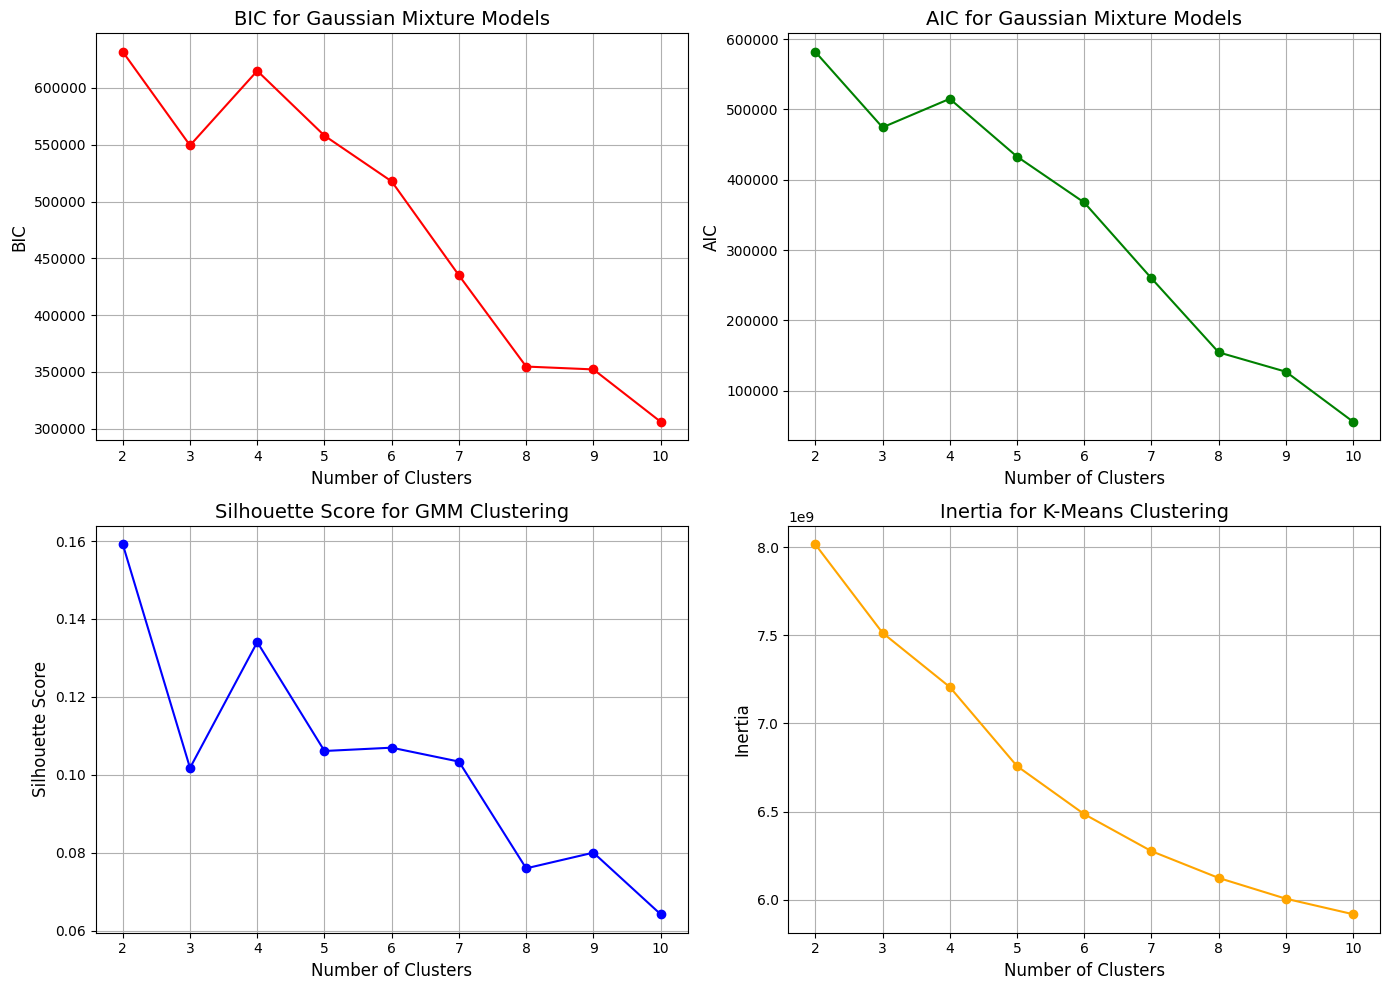

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming your 360 images data is in a variable `images_matrix`
# Replace `images_matrix` with your actual image dataset

# Step 1: Dimensionality reduction with PCA to retain 90% variance
pca = PCA(n_components=0.90, random_state=42)  # Retain at least 90% variance
reduced_data = pca.fit_transform(images_matrix)
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Initialize ranges for clusters
num_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10
bic_values = []
aic_values = []
silhouette_scores = []

# Step 3: Fit Gaussian Mixture Model (GMM) and compute AIC/BIC/Silhouette
for n_clusters in num_clusters:
    # Gaussian Mixture Model for AIC/BIC
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))  # Append BIC
    aic_values.append(gmm.aic(reduced_data))  # Append AIC

    # Silhouette Score (based on GMM cluster assignments)
    cluster_labels = gmm.predict(reduced_data)
    silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

inertia_values = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the metrics to determine optimal clusters
plt.figure(figsize=(14, 10))

# BIC Plot
plt.subplot(2, 2, 1)
plt.plot(num_clusters, bic_values, marker='o', linestyle='-', color='r', label='BIC')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('BIC', fontsize=12)
plt.title('BIC for Gaussian Mixture Models', fontsize=14)
plt.grid(True)

# AIC Plot
plt.subplot(2, 2, 2)
plt.plot(num_clusters, aic_values, marker='o', linestyle='-', color='g', label='AIC')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('AIC', fontsize=12)
plt.title('AIC for Gaussian Mixture Models', fontsize=14)
plt.grid(True)

# Silhouette Score Plot
plt.subplot(2, 2, 3)
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for GMM Clustering', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='orange', label='Inertia')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia for K-Means Clustering', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()



### Step 13: K-Means Clustering with 3 Clusters
In this section, we apply K-Means clustering to group the dataset into 3 clusters and evaluate the clustering performance. A 2D visualization of the clustering results is also provided.

#### Key Steps:
1. **Cluster Data Using K-Means:**
   - The dataset, reduced to principal components using PCA, is clustered into 3 groups using `KMeans`.
   - The number of clusters (`n_clusters=3`) is based on prior evaluation using metrics such as AIC, BIC, and Silhouette Scores.

2. **Evaluate Clustering Performance:**
   - **Clustering Accuracy:** 
     - Ground truth labels are extracted from image filenames (`I`, `M`, `S`) and encoded numerically.
     - Accuracy is computed by matching true labels to predicted clusters. Note that label mapping is required since K-Means clustering is unsupervised.
   - **Silhouette Score:**
     - Measures how well data points fit within their clusters compared to neighboring clusters. Higher values indicate better-defined clusters.

3. **Visualize Clustering Results:**
   - The clustering results are plotted in 2D using the first two principal components (`PC1` and `PC2`).
   - Each data point is colored according to its assigned cluster label.
   - A colorbar provides context for the cluster labels.

#### Outcome:
- The clustering accuracy and silhouette score provide quantitative measures of th
- The Clustering Accuracy (K-Means, 3 Clusters): 0.33 and The 
Silhouette Score (K-Means, 3 Clusters): 0.10e clustering quality.
- The 2D plot illustrates the cluster separation in the PCA-reduced feature space, highlighting the distribution of clusters.

#### Notes:
- Clustering accuracy may not be perfect due to the unsupervised nature of K-Means and potential overlap between true labels.
- The silhouette score helps validate cluster quality independently of true labels.


Clustering Accuracy (K-Means, 3 Clusters): 0.33
Silhouette Score (K-Means, 3 Clusters): 0.10


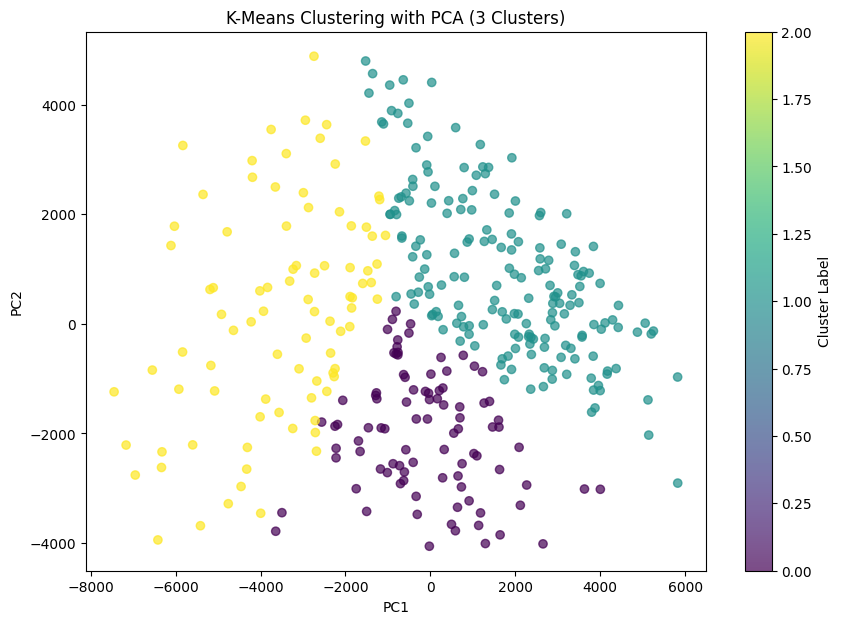

In [ ]:
# 5


# Step 5: Cluster with 3 clusters (based on the question)
n_clusters = 3

# Apply K-Means for 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Optional: Evaluate clustering accuracy
# Assuming `true_labels` contains the ground truth labels ('I', 'M', 'S') for the images
# Replace `filenames` or `true_labels` with your actual label data
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)  # Convert to numerical labels

# Compute clustering accuracy (mapping required for unsupervised labels)
accuracy = accuracy_score(encoded_true_labels, kmeans_labels)
print(f"Clustering Accuracy (K-Means, 3 Clusters): {accuracy:.2f}")

# Optional: Silhouette Score for 3 clusters
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
print(f"Silhouette Score (K-Means, 3 Clusters): {silhouette_avg:.2f}")

# Step 6: Visualize clustering results in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering with PCA (3 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Label")
plt.show()

### GMM Clustering and Synthetic Sample Generation
In this section, we apply Gaussian Mixture Models (GMM) to cluster the dataset into 3 clusters, evaluate clustering accuracy, and generate new synthetic samples.

#### Key Steps:
1. **Dimensionality Reduction with PCA:**
   - The dataset is reduced to a lower-dimensional space while retaining 90% of the variance. This simplifies clustering and ensures computational efficiency.

2. **Determine Optimal Clusters:**
   - **AIC and BIC Metrics:**
     - AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are used to identify the optimal number of clusters by balancing model fit and complexity.
   - **Silhouette Score:**
     - Measures how well the samples are clustered with respect to their assigned cluster.
   - **Inertia (K-Means):**
     - Provided for comparison to evaluate the cluster compactness.

3. **Clustering with GMM (3 Clusters):**
   - GMM is applied with 3 clusters as determined from the evaluation.
   - Each data point is assigned to a cluster.

4. **Clustering Accuracy:**
   - Ground truth labels are extracted and encoded for comparison.
   - Accuracy is computed by matching true labels to predicted clusters (mapping required due to unsupervised nature).

5. **Generate Synthetic Samples:**
   - GMM generates 20 new synthetic samples in the reduced feature space.
   - These samples are mapped back to the original space using PCA’s inverse transform.

6. **Visualize Synthetic Samples:**
   - The generated synthetic images are displayed to observe their resemblance to the original dataset.

#### Outcome:
- **Clustering Accuracy:** Quantifies how well the clusters align with the true labels.
- **Synthetic Samples:** Demonstrate the generative capabilities of GMM to create new data points resembling the original dataset.

#### Notes:
- GMM offers both clustering and data generation capabilities, making it a versatile tool for tasks requiring cluster-based generative models.
- The generated synthetic samples provide insights into the learned distribution of the dataset.


Reduced dimensionality to: 112 components


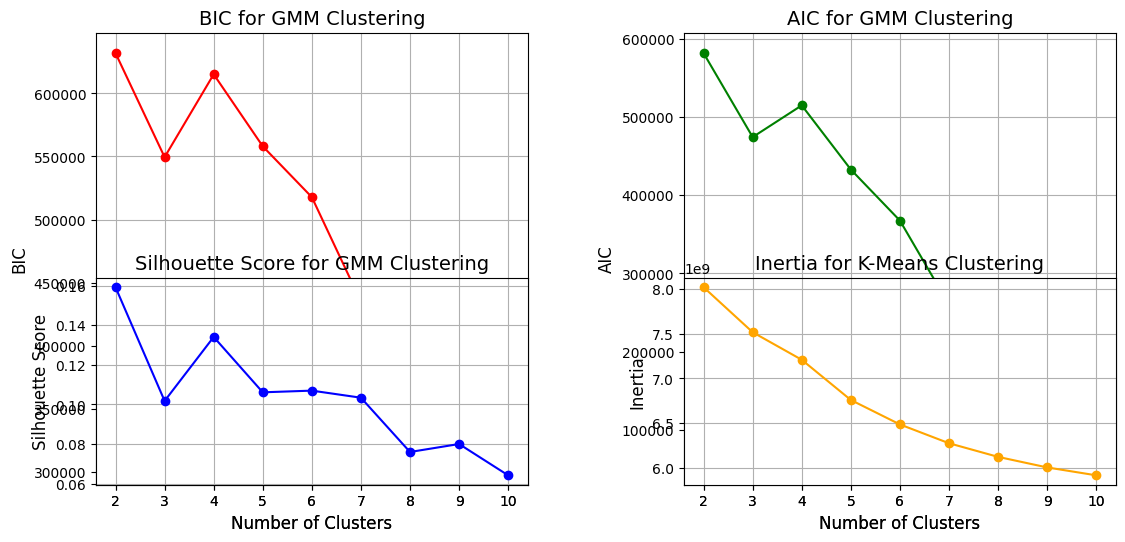

Clustering Accuracy (GMM, 3 Clusters): 0.33


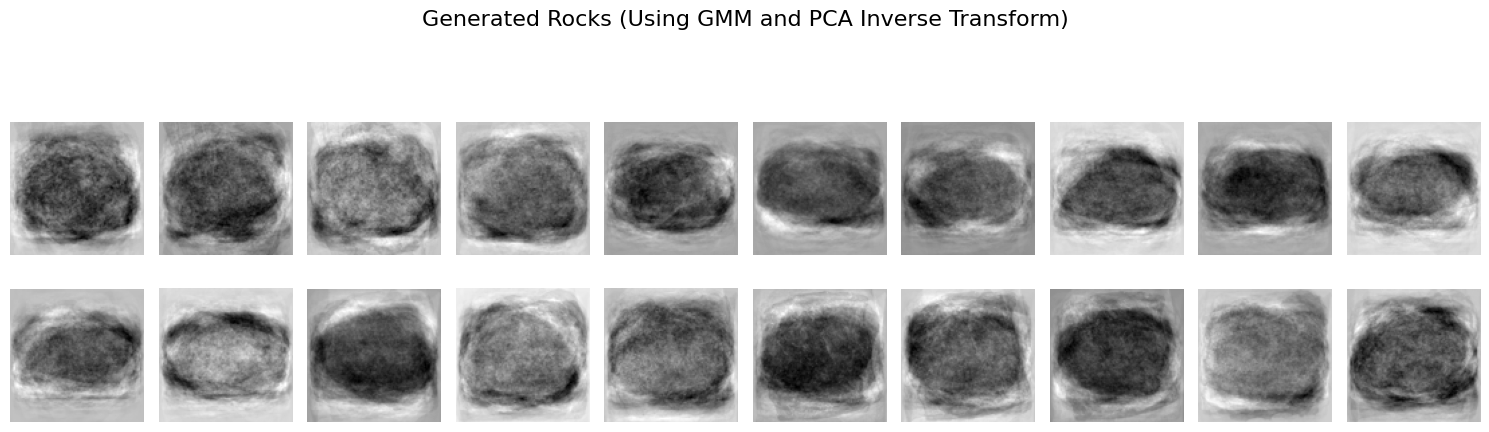

In [ ]:
# 6

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming `images_matrix` contains the 360 images data as a matrix

# Step 1: Dimensionality reduction with PCA to retain at least 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(images_matrix)
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Determine the optimal number of clusters using Gaussian Mixture Model (GMM)
num_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10
bic_values = []
aic_values = []

for n_clusters in num_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))
    aic_values.append(gmm.aic(reduced_data))

# Step 4: Inertia (K-Means for comparison)
inertia_values = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

# Plot AIC and BIC to find the optimal number of clusters
plt.figure(figsize=(12, 6))

# BIC Plot
plt.subplot(1, 2, 1)
plt.plot(num_clusters, bic_values, marker='o', linestyle='-', color='r')
plt.title("BIC for GMM Clustering", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("BIC", fontsize=12)
plt.grid(True)

# AIC Plot
plt.subplot(1, 2, 2)
plt.plot(num_clusters, aic_values, marker='o', linestyle='-', color='g')
plt.title("AIC for GMM Clustering", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("AIC", fontsize=12)
plt.grid(True)

# Silhouette Score Plot
plt.subplot(2, 2, 3)
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for GMM Clustering', fontsize=14)
plt.grid(True)

# Inertia Plot
plt.subplot(2, 2, 4)
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='orange', label='Inertia')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia for K-Means Clustering', fontsize=14)
plt.grid(True)


plt.tight_layout()
plt.show()

# Step 3: Set the number of clusters to 3 (as per the question)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Step 4: Clustering Accuracy
# Assuming `true_labels` contains the ground truth labels ('I', 'M', 'S') for the images
# Replace `filenames` or `true_labels` with your actual label data
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)

# Compute clustering accuracy
accuracy = accuracy_score(encoded_true_labels, gmm_labels)
print(f"Clustering Accuracy (GMM, 3 Clusters): {accuracy:.2f}")

# Step 5: Generate 20 new samples using the GMM and inverse transform to original space
new_samples, _ = gmm.sample(20)  # Generate 20 new samples in the reduced space
new_samples_original_space = pca.inverse_transform(new_samples)  # Map back to original space

# Step 6: Visualize the generated samples
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original_space[i].reshape(image_size), cmap='gray')
    plt.axis('off')

plt.suptitle("Generated Rocks (Using GMM and PCA Inverse Transform)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Load and Preprocess Images for Training and Validation
In this section, we load images from the training and validation directories, preprocess them, and prepare them for training a neural network.

#### Key Steps:
1. **Directories:**
   - **Training Directory (`360 Rocks`)**: Contains images used for training the neural network.
   - **Validation Directory (`120 Rocks`)**: Contains images used for evaluating the model during training.

2. **Image Preprocessing:**
   - **Grayscale Conversion:** Each image is converted to grayscale using `Image.open(image_path).convert('L')` to reduce complexity.
   - **Resizing:** Images are resized to `100x100` pixels to standardize input dimensions.
   - **Normalization:** Pixel values are normalized to the range `[0, 1]` by dividing by 255.0.

3. **Label Extraction:**
   - Labels are inferred from the first character of the filename:
     - `I` → 0
     - `M` → 1
     - `S` → 2
   - This encoding converts categorical labels into numerical values.

4. **Reshape for Model Input:**
   - Images are reshaped to include a channel dimension (`100x100x1`) as required by convolutional neural networks (CNNs).

5. **Output:**
   - **Training Data (`X_train`, `y_train`):** Preprocessed images and corresponding labels from the training set.
   - **Validation Data (`X_val`, `y_val`):** Preprocessed images and corresponding labels from the validation set.

#### Outcome:
- The data is now ready for input into a CNN model, with consistent dimensions and normalized values for efficient processing.


In [37]:
train_directory = '360 Rocks'  
val_directory = '120 Rocks'    

# Function to load and preprocess images
def load_images(directory, image_size=(100, 100)):
    images = []
    labels = []
    for image_file in os.listdir(directory):
        image_path = os.path.join(directory, image_file)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize(image_size)
        images.append(np.array(image) / 255.0)  # Normalize the image
        # Extract label from the filename
        label = image_file[0]
        labels.append(0 if label == 'I' else 1 if label == 'M' else 2)
    return np.array(images), np.array(labels)

# Load training and validation data
X_train, y_train = load_images(train_directory)
X_val, y_val = load_images(val_directory)

# Reshape images to add channel dimension
X_train = X_train.reshape(-1, 100, 100, 1)
X_val = X_val.reshape(-1, 100, 100, 1)

### Building and Training a Deep Convolutional Neural Network (CNN)
In this section, we build and train a complex CNN model for rock classification using the preprocessed dataset. The model architecture is enhanced for better feature extraction, and data augmentation is applied to improve generalization.

#### Key Steps:
1. **Model Architecture:**
   - **First Convolutional Block:**
     - Two `Conv2D` layers with 32 filters each and ReLU activation.
     - Followed by a `MaxPooling2D` layer for downsampling.
   - **Second Convolutional Block:**
     - A `Conv2D` layer with 64 filters and ReLU activation.
     - Followed by a `MaxPooling2D` layer.
   - **Third Convolutional Block:**
     - Two `Conv2D` layers with 128 filters each and ReLU activation.
     - Followed by a `MaxPooling2D` layer.
   - **Fourth Convolutional Block (Optional):**
     - A `Conv2D` layer with 256 filters and ReLU activation.
     - Followed by a `MaxPooling2D` layer.
   - **Fully Connected Layers:**
     - Flatten the output from convolutional layers.
     - A dense layer with 256 units and ReLU activation, followed by a Dropout layer (50%).
     - A second dense layer with 128 units and a Dropout layer (30%).
     - A latent layer with 8 units (as required in the assignment).
     - An output layer with 3 units (softmax activation for multi-class classification).

2. **Data Augmentation:**
   - A `ImageDataGenerator` is used to augment training data with transformations like rotation, shift, shear, zoom, and horizontal flipping.

3. **Compile the Model:**
   - Optimizer: Adam with a reduced learning rate (`0.0001`) for fine-tuning.
   - Loss Function: Sparse categorical crossentropy for multi-class classification.
   - Metrics: Accuracy to evaluate model performance.

4. **Training the Model:**
   - Training is conducted over 20 epochs using augmented data.
   - Validation data is used to monitor performance during training.

5. **Measure Training Time:**
   - The training time is recorded to evaluate the computational cost of the model.

#### Outcome:
- **Training Time:** Printed at the end to indicate the duration of training.
- **Model Training:** The CNN learns to classify rock images into 3 categories (`I`, `M`, `S`) based on augmented training data.
- **Enhanced Generalization:** Data augmentation helps prevent overfitting and improves robustness to variations in the dataset.

#### Notes:
- The latent layer (8 units) aligns with assignment requirements, enabling feature extraction for subsequent analysis (e.g., Procrustes alignment with human data).
- The dropout layers mitigate overfitting by introducing regularization.


In [ ]:
# 7B

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Build a more complex model
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Added another Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Added another Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Block (Optional)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Increased depth with more filters
model.add(layers.MaxPooling2D((2, 2)))  # Additional pooling layer for downsampling

# Flattening and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Increased dense layer size
model.add(layers.Dropout(0.5))  # Regularization Dropout layer

model.add(layers.Dense(128, activation='relu'))  # Retained the original Dense layer
model.add(layers.Dropout(0.3))  # Added a second Dropout layer

# Output Layers
model.add(layers.Dense(8, activation='relu'))  # Latent layer before output
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to your training data
datagen.fit(X_train)
# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Record start time
import time
start_time = time.time()

# Train the model with data augmentation
history = model.fit(X_train, y_train,
                    epochs=17,
                    validation_data=(X_val, y_val))

# Record end time
end_time = time.time()
training_time = end_time - start_time
# 7A
print(f"Training Time: {training_time:.2f} seconds")

c:\Users\ramch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.3213 - loss: 1.0997 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.3562 - loss: 1.0985 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.2926 - loss: 1.0999 - val_accuracy: 0.3500 - val_loss: 1.0985
Epoch 4/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3401 - loss: 1.0988 - val_accuracy: 0.3583 - val_loss: 1.0985
Epoch 5/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3276 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 6/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3229 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 7/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3813 - loss: 1.0972 - val_accuracy: 0.3250 - val_loss: 1.0983
Epoch 8/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.3554 - loss: 1.0986 - val_accuracy: 0.

### Evaluating and Visualizing Model Performance
In this section, we evaluate the performance of the trained CNN model by analyzing its training and validation loss/accuracy over epochs and visualizing the results.

#### Key Steps:
1. **Training Time:**
   - The total training time is printed to provide insights into the computational cost of training the model.

2. **Loss Plot:**
   - **Training Loss:** Indicates how well the model is minimizing the loss function on the training data during each epoch.
   - **Validation Loss:** Indicates how well the model generalizes to unseen validation data during training.
   - A decreasing trend in both training and validation loss implies the model is learning effectively without overfitting.

3. **Accuracy Plot:**
   - **Training Accuracy:** Measures the model's classification accuracy on the training dataset during each epoch.
   - **Validation Accuracy:** Measures the model's classification accuracy on the validation dataset.
   - Increasing accuracy values over epochs indicate improved classification performance.

4. **Visualization:**
   - Two subplots are created:
     - Left: Training and validation loss vs. epochs.
     - Right: Training and validation accuracy vs. epochs.
   - Legends are added for clarity.

#### Outcome:
- **Trends in Loss and Accuracy:**
  - Loss and accuracy trends provide insights into the model's learning progress and generalization ability.
  - Consistency between training and validation trends suggests good generalization, while divergence indicates potential overfitting or underfitting.
- **Training Time:** Provides an understanding of the time required to train the model with the given dataset and architecture.

#### Notes:
- Significant gaps between training and validation accuracy or loss might indicate overfitting.
- If validation performance stagnates while training performance improves, consider tuning hyperparameters, increasing data augmentation, or adding regularization.


Training Time: 27.64 seconds


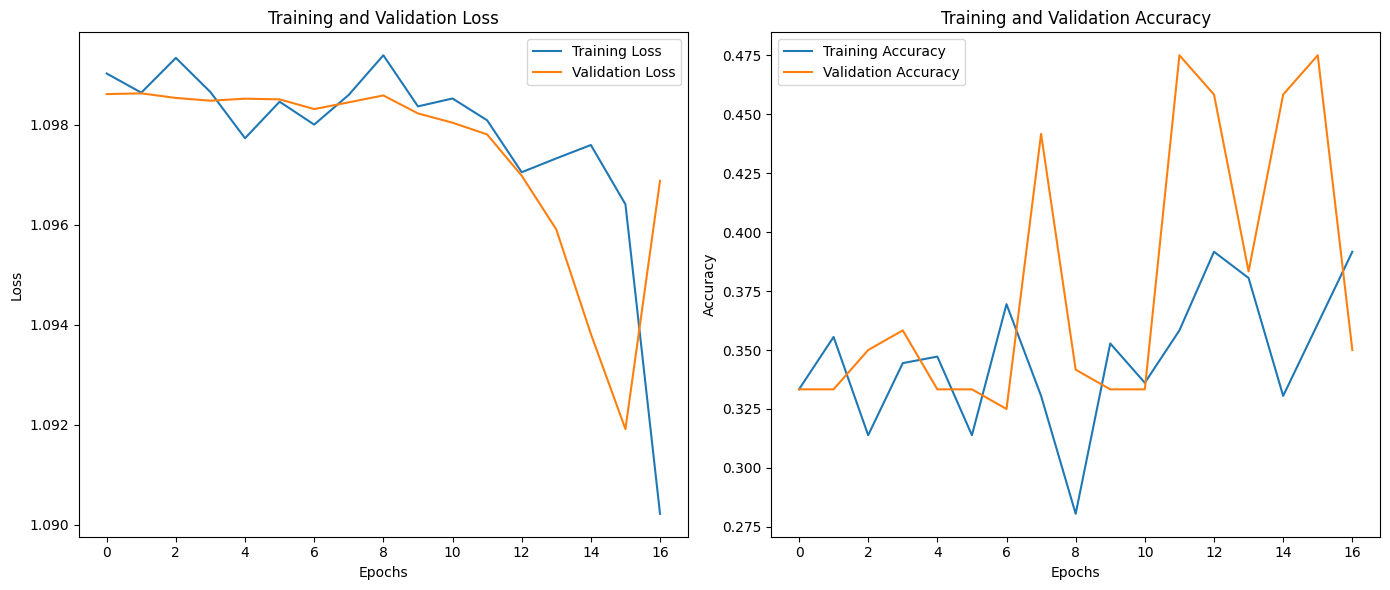

In [39]:

print(f"Training Time: {training_time:.2f} seconds")

# Plot training and validation loss/accuracy
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Counting Model Parameters
In this section, we compute the total number of parameters in the CNN model, as well as the number of bias parameters, to evaluate the complexity of the model architecture.

#### Key Steps:
1. **Total Parameters:**
   - The total number of parameters in the model is calculated using the `model.count_params()` function.
   - This includes all trainable parameters (weights and biases) in each layer of the model.

2. **Bias Parameters:**
   - Bias parameters are identified as weights with a shape of length 1 (since they represent biases for each neuron or filter).
   - The total number of bias parameters is computed by summing up the product of their shapes.

3. **Output:**
   - **Total Number of Parameters:** Indicates the total computational and storage requirements of the model.
   - **Number of Bias Parameters:** Provides insight into how biases contribute to the total parameter count.

#### Outcome:
- **Model Complexity:**
  - The total number of parameters (1,168,707) reflects the depth and complexity of the architecture.
  - The relatively small number of bias parameters (1,035) indicates that most parameters are dedicated to convolutional and dense layer weights.

#### Notes:
- A high number of parameters might lead to overfitting if the training data is insufficient.
- If the number of parameters is too large, consider reducing the number of filters or dense layer units to optimize the model for the available dataset.


In [ ]:
# 7C

# Get the total number of parameters and bias parameters
total_params = model.count_params()
bias_params = np.sum([np.prod(p.shape) for p in model.trainable_weights if len(p.shape) == 1])

print(f"Total Number of Parameters: {total_params}")
print(f"Number of Bias Parameters: {bias_params}")


Total Number of Parameters: 1168707
Number of Bias Parameters: 1035


### Full Pipeline for Procrustes Analysis and Correlation Evaluation
This section integrates all the key steps for loading data, building a CNN model, extracting latent representations, and comparing them with human-generated data using Procrustes analysis and correlation evaluation.

#### Key Steps:
1. **Data Loading and Preprocessing:**
   - Images are loaded from the training (`360 Rocks`) and validation (`120 Rocks`) directories.
   - Preprocessing includes:
     - Grayscale conversion.
     - Resizing to `100x100` pixels.
     - Normalization of pixel values to `[0, 1]`.
     - Adding a channel dimension for compatibility with CNN layers.

2. **Model Construction:**
   - A CNN is built using TensorFlow's Functional API:
     - Three convolutional layers (`Conv2D`) for feature extraction.
     - Two max-pooling layers (`MaxPooling2D`) for downsampling.
     - Dense layers, including a latent layer with 8 neurons (as required by the assignment).
     - A final softmax output layer for 3-class classification.

3. **Model Training:**
   - The model is trained for one epoch to initialize weights and ensure functionality.

4. **Extract Latent Representations:**
   - An intermediate model is created to output the activations of the next-to-last layer (8 neurons).
   - These activations (latent representations) are extracted for both training and validation datasets.

5. **Load Human-Generated Data:**
   - Human-generated MDS data (`mds_360.txt` and `mds_120.txt`) is loaded for training and validation comparisons.

6. **Procrustes Analysis:**
   - Aligns the latent representations with the human data for training and validation datasets.
   - **Disparity:** Measures misalignment between the two datasets (lower disparity indicates better alignment).

7. **Compute Correlations:**
   - Pearson correlations between aligned dimensions of human and model-generated features are computed for both datasets.

8. **Summary Table:**
   - A correlation table is created to summarize the correlations for each of the 8 dimensions for bot### Results: Training and Validation Disparity and Correlation
This section provides the results of the Procrustes analysis and correlation computations for the CNN's latent layer activity compared to human-generated features.

#### Key Results:
1. **Training Data Disparity:**
   - **Value:** `0.8839997224883644`
   - Interpretation: Indicates the alignment between the model’s latent features and the human-generated features for the training dataset. A lower disparity suggests better alignment.

2. **Validation Data Disparity:**
   - **Value:** `0.9314538964502364`
   - Interpretation: Similar to training disparity but for the validation dataset. The disparity is slightly higher than for training, which may indicate a difference in alignment due to unseen data.

3. **Dimension-Wise Correlations:**
   - **Training Correlation:** Pearson correlation coefficients for each of the 8 dimensions between the aligned model and human features on the training dataset.
   - **Validation Correlation:** Similar correlations but for the validation dataset.

#### Observations:
- **Disparity:**
  - Both training and validation disparities are moderate, indicating a reasonable alignment between the model and human features.
  - The slightly higher disparity for validation suggests the model generalizes but could benefit from additional fine-tuning or data augmentation.

- **Correlations:**
  - Correlations for specific dimensions vary, with higher values (e.g., `0.556985` for Dimension 4 in training) indicating strong alignment.
  - Validation correlations are generally lower than training, reflecting a decrease in alignment for unseen data.

#### Notes:
- **Improvement Strategies:**
  - Adding more training data or increasing the complexity of the model (e.g., additional layers or filters) could enhance alignment.
  - Fine-tuning hyperparameters or using more sophisticated data augmentation could also improve generalization.
  
- **Model Performance Insight:**
  - The results provide a quantitative evaluation of how well the model's learned features reflect human-perceived features, supporting further analysis and refinement.
e or training procedure for improved alignment.


In [ ]:
# 7D

import os
import numpy as np
import tensorflow as tf
from PIL import Image
import time
from scipy.spatial import procrustes
import pandas as pd

# Function to load and preprocess image data
def load_images(directory, image_size=(100, 100)):
    images, labels = [], []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        image = Image.open(file_path).convert('L').resize(image_size)  # Grayscale and resize
        images.append(np.array(image) / 255.0)  # Normalize pixel values
        # Assign label based on filename's first character
        labels.append(0 if file.startswith('I') else 1 if file.startswith('M') else 2)
    return np.array(images), np.array(labels)

# Directories for training and validation datasets
train_dir = '360 Rocks'
val_dir = '120 Rocks'

# Load training and validation datasets
X_train, y_train = load_images(train_dir)
X_val, y_val = load_images(val_dir)

# Add channel dimension to images
X_train = X_train.reshape(-1, 100, 100, 1)
X_val = X_val.reshape(-1, 100, 100, 1)

# Build the CNN model using Functional API
inputs = tf.keras.Input(shape=(100, 100, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)  # Layer with 8 neurons (before softmax)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

# Compile and train the model for one epoch to initialize it
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

# Create a model to extract the next-to-last layer's output
intermediate_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

# Extract neuron activities from the next-to-last layer for both datasets
train_activities = intermediate_model.predict(X_train)
val_activities = intermediate_model.predict(X_val)

# Load human-provided MDS data for comparison
human_train_data = np.loadtxt('mds_360.txt')
human_val_data = np.loadtxt('mds_120.txt')

# Perform Procrustes analysis on training data
mtx1_train, mtx2_train, disparity_train = procrustes(human_train_data, train_activities)
print(f"Training Data Disparity: {disparity_train}")

# Perform Procrustes analysis on validation data
mtx1_val, mtx2_val, disparity_val = procrustes(human_val_data, val_activities)
print(f"Validation Data Disparity: {disparity_val}")

# Compute correlations for each dimension
correlations_train = [np.corrcoef(mtx1_train[:, i], mtx2_train[:, i])[0, 1] for i in range(8)]
correlations_val = [np.corrcoef(mtx1_val[:, i], mtx2_val[:, i])[0, 1] for i in range(8)]

# Create a summary table of correlations
correlation_table = pd.DataFrame({
    "Dimension": range(1, 9),
    "Training Correlation": correlations_train,
    "Validation Correlation": correlations_val
})

# Display correlation results
print(correlation_table)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.3633 - loss: 1.2478 - val_accuracy: 0.3417 - val_loss: 1.0985
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Training Data Disparity: 0.961044931218614
Validation Data Disparity: 0.9698149248422547
   Dimension  Training Correlation  Validation Correlation
0          1              0.251567                0.281231
1          2              0.300860                0.189257
2          3              0.088591                0.175638
3          4              0.293892                0.166276
4          5              0.195134                0.143192
5          6              0.044321                0.086295
6          7              0.156716                0.110391
7          8              0.091970                0.186168
